In [31]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#uploaded = files.upload()

# **Carga del conjunto de datos**

In [2]:
#Carga del fichero y visualización de la estructura del conjunto de datos
heartdf = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


El dataset hace referencia a un conjunto de datos de pacientes relacionados con enfermedades cardiacas. A partir de dichos datos trata de predecir que pacientes tienen más probabilidad de sufrir una enfermedad del corazón.  

Los datos contenidos en el dataset son un subconjunto de un estudio más amplio realizado sobre 4 bases de datos de diferentes países, centrándonos en nuestro caso en un grupo de pacientes pertenecientes a la Cleveland Clinic Foundation.

El dataset presenta un total de 303 filas y 14 columnas:

*   Age: edad del paciente en años
*   Sex: 1 = Hombre, 0 = Mujer
*   Cp: tipo de dolor en el pecho (0 = Angina típica, 1 = Angina atípica, 2 =   Dolor no anginoso, 3 = Asintomático)
*   Trtbps: presión arterial en reposo (en mm Hg)
*   Chol: colesterol (en mg/dl)
*   Fbs: azúcar en sangre en ayunas > 120 mg/dl (1 = true; 0 = false)
*   Restecg: resultados electrocardiográficos en reposo (0 = normal, 1 = anomalía en la onda ST-T, 2 = hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes)
*   Thalachh: frecuencia cardíaca máxima alcanzada
*   Exng: angina inducida por el ejercicio (1 = sí; 0 = no)
*   Oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo
*   Slp: pendiente del segmento ST de ejercicio máximo (0 = ascendente, 1 = plano, 2 = descendente)
*   Caa: número de vasos principales (0-3) coloreados por fluoroscopia
*   Thall: Resultado de la prueba de esfuerzo con talio 0-3
*   Output: 0 = menor probabilidad de infarto 1 = más probabilidad de infarto



In [3]:
heartdf.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Análisis de los datos**

In [4]:
#Mostramos algunos datos estadísticos básicos del conjunto de datos:
heartdf.drop(columns='output').describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Observamos que las variables age, trtbps, chol y thalachh presentan una alta desviación estándar.

In [5]:
#Se verifica la existencia de valores nulos
heartdf.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No existen valores nulos

### **Análisis de la variable objetivo**

Frecuencia de la variable objetivo:
1    165
0    138
Name: output, dtype: int64


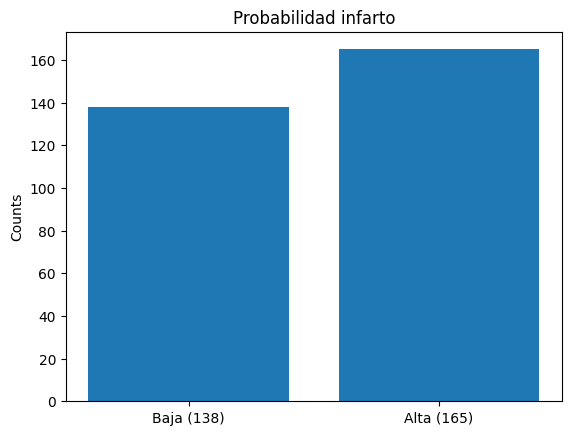

In [6]:
freq = heartdf['output'].value_counts()
print("Frecuencia de la variable objetivo:") 
print(freq) 
plt.bar(freq.index.values, freq)
plt.xticks(freq.index.values, ('Alta ('+str(freq[1])+')', 'Baja ('+str(freq[0])+')'))
plt.ylabel('Counts')
plt.title("Probabilidad infarto");

En base a los resultados, la variable objetivo parece estar distribuida de manera uniforme, si bien es mayor el número de pacientes con probabilidad de tener un infarto.

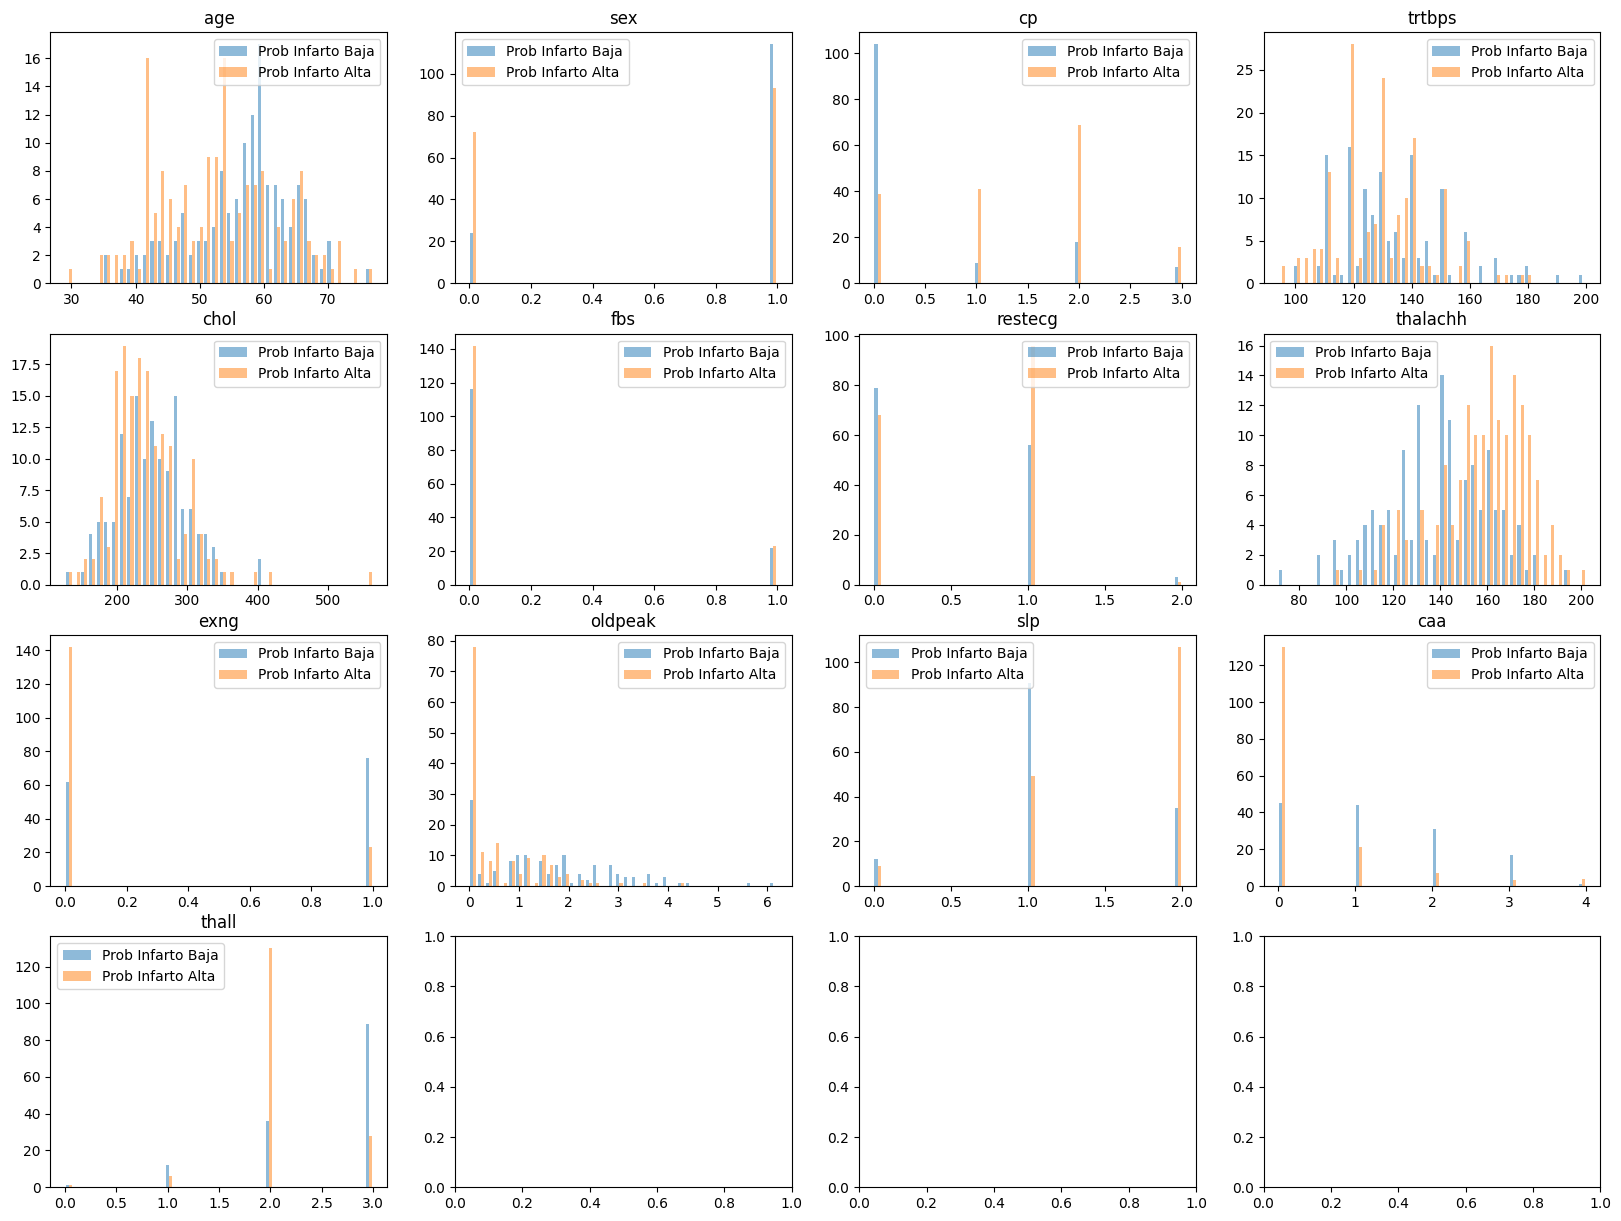

In [7]:
#Visualizamos la distribución del resto de variables según la variable objetivo
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

for i, column in enumerate(heartdf.columns[:-1]):

    b = heartdf[column][heartdf['output'] == 0]
    a = heartdf[column][heartdf['output'] == 1]
    ax = axs[i//4][i%4]
    ax.hist([b,a], label=['Prob Infarto Baja', 'Prob Infarto Alta'], alpha=0.5, bins=40)
    ax.set_title(column)
    ax.legend()

plt.show()

### **Comprobación de la normalidad**

Aplicamos el test de Shapiro-Wilk a cada variable del dataset para comprobar la normalidad. 

El resultado del test se establece comparando el valor del p-valor con el nivel de significancia alpha (0.05):
*   Si p-valor es mayor que alpha, se considera que la muestra mantiene una distribución normal
*   Si p-valor no es mayor que alpha la muestra no mantiene una distribución normal


In [34]:
for c in heartdf.columns.tolist():
  stat, p = shapiro(heartdf[c])
  if p > 0.05:
    print('La variable: ',c ," con P = ", p , ' sigue una distribución normal')
  else:
    print('La variable: ',c ," con P = ", p , ' NO sigue una distribución normal')

La variable:  age  con P =  0.005800595041364431  NO sigue una distribución normal
La variable:  sex  con P =  2.750313317800108e-26  NO sigue una distribución normal
La variable:  cp  con P =  1.857025903554317e-19  NO sigue una distribución normal
La variable:  trtbps  con P =  1.4575286968465662e-06  NO sigue una distribución normal
La variable:  chol  con P =  5.364368060867264e-09  NO sigue una distribución normal
La variable:  fbs  con P =  5.4308542423809215e-30  NO sigue una distribución normal
La variable:  restecg  con P =  1.3784006410641926e-23  NO sigue una distribución normal
La variable:  thalachh  con P =  6.620732165174559e-05  NO sigue una distribución normal
La variable:  exng  con P =  3.8468651050195e-26  NO sigue una distribución normal
La variable:  oldpeak  con P =  8.183467206576554e-17  NO sigue una distribución normal
La variable:  slp  con P =  2.5741052869083275e-21  NO sigue una distribución normal
La variable:  caa  con P =  6.270960025237855e-22  NO sigu

### **Valores extremos**
El dataset presenta una alta disparidad en las escalas de valores de algunas variables en comparación con otras, al igual que la desviación estandard. Estos valores no los consideramos outliers erroneos dado que entran dentro de los posibles valores de las observaciones. 

Para evitar que estas variables con valores elevados dominen respecto las variables con valores reducidos se deberían normalizar para que todas las variables independientes del estudio tengan el mismo rango de valores, normalmente [0,1].

Normalizar variables es muy importante para poder aplicar algoritmos de machine learning, de lo contrario los modelos resultantes tenderán a sobreponderar las variables de rangos elevados.

In [19]:
# Normalizamos las variables entre [0,1]
scaler = MinMaxScaler()
heartdf_normalized_n = scaler.fit_transform(heartdf)

heartdf_normalized = pd.DataFrame(heartdf_normalized_n, columns = heartdf.columns.tolist() )
heartdf_normalized.drop(columns='output').describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,0.528465,0.189210,0.0,0.385417,0.541667,0.666667,1.0
sex,303.0,0.683168,0.466011,0.0,0.000000,1.000000,1.000000,1.0
cp,303.0,0.322332,0.344017,0.0,0.000000,0.333333,0.666667,1.0
trtbps,303.0,0.354941,0.165454,0.0,0.245283,0.339623,0.433962,1.0
chol,303.0,0.274575,0.118335,0.0,0.194064,0.260274,0.339041,1.0
fbs,303.0,0.148515,0.356198,0.0,0.000000,0.000000,0.000000,1.0
restecg,303.0,0.264026,0.262930,0.0,0.000000,0.500000,0.500000,1.0
thalachh,303.0,0.600358,0.174849,0.0,0.477099,0.625954,0.725191,1.0
exng,303.0,0.326733,0.469794,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,303.0,0.167678,0.187270,0.0,0.000000,0.129032,0.258065,1.0


Comprobamos que los histogramas de las variables del dataframe Normalizado efectivamente conservan las mismas distribuciones pero esta vez todas entre el rango de valores [0,1]

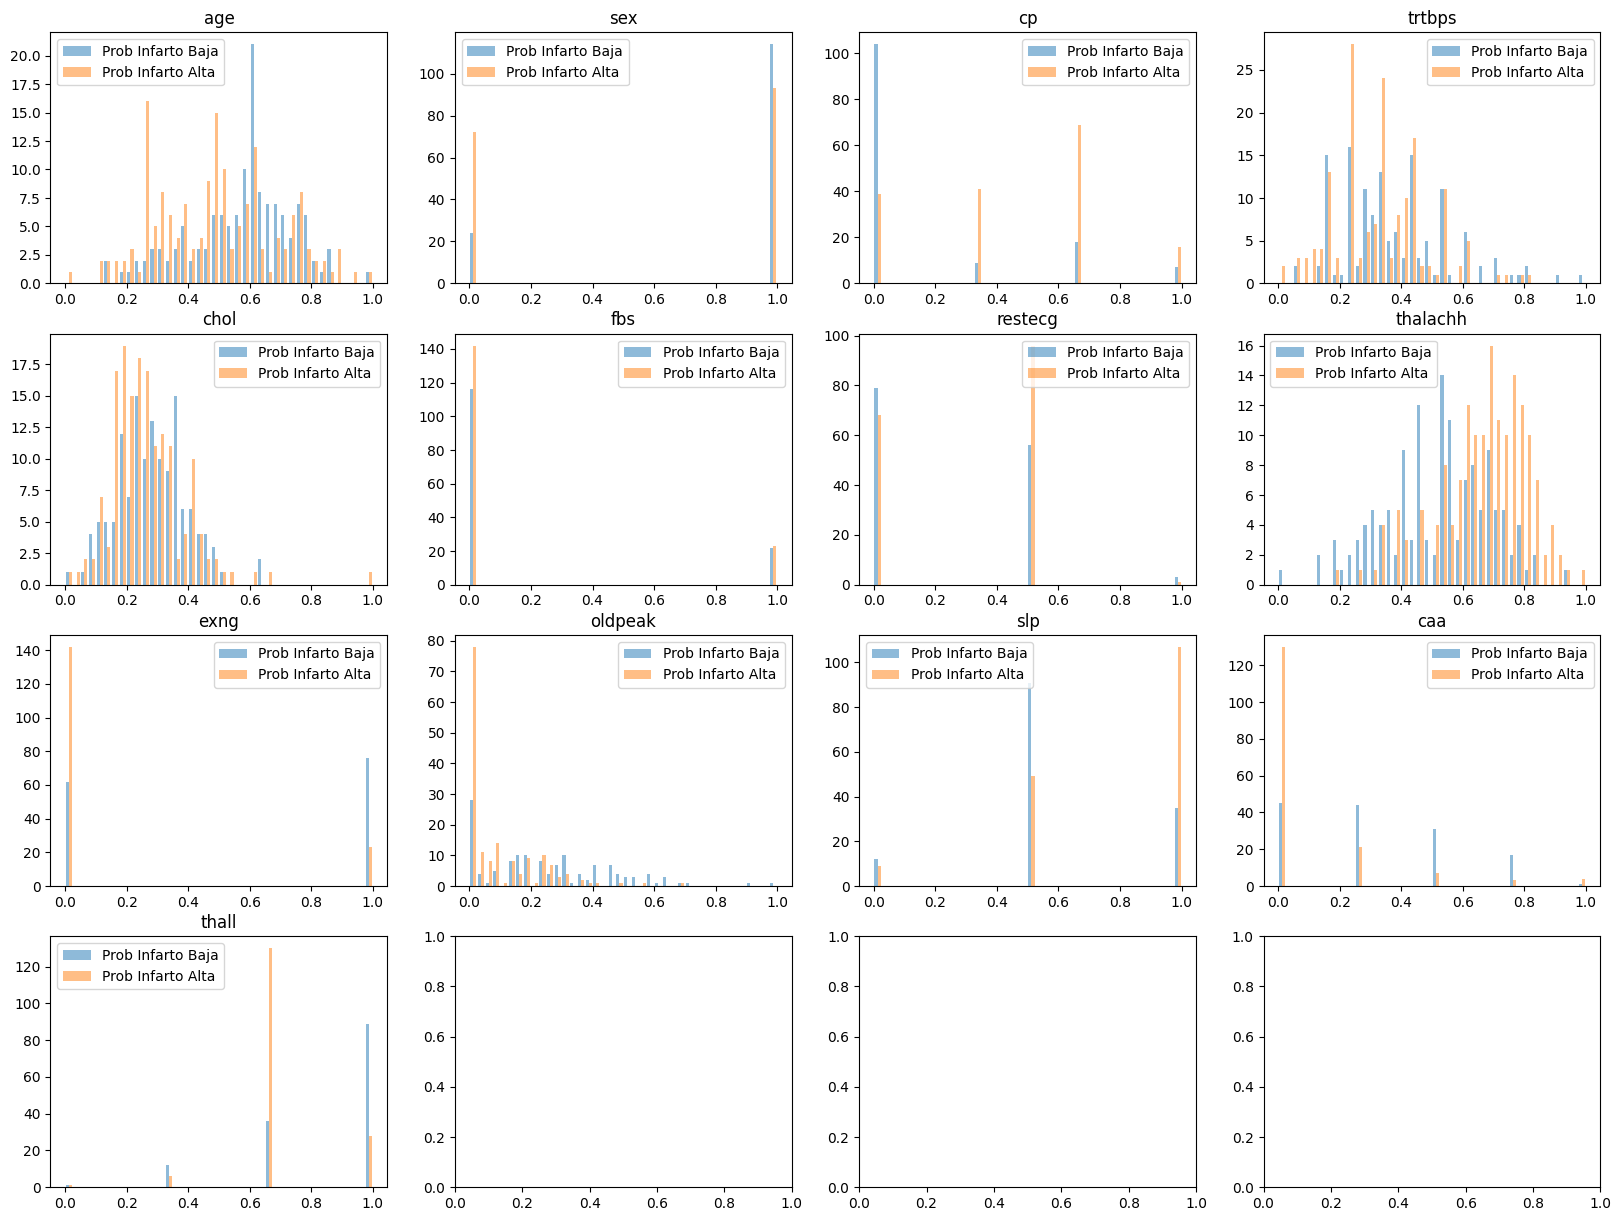

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

for i, column in enumerate(heartdf_normalized.columns[:-1]):

    b = heartdf_normalized[column][heartdf_normalized['output'] == 0]
    a = heartdf_normalized[column][heartdf_normalized['output'] == 1]
    ax = axs[i//4][i%4]
    ax.hist([b,a], label=['Prob Infarto Baja', 'Prob Infarto Alta'], alpha=0.5, bins=40)
    ax.set_title(column)
    ax.legend()

plt.show()

**Correlación de variables**

Procedemos a generar la matriz de correlación entre las vaiables independientes y visualizamos los porcentajes de correlación mediante un heatmap.

También generamos la matriz de dispersión para visualizar gráficamente la relación entre cada par de variables y observar posibles correlaciones.

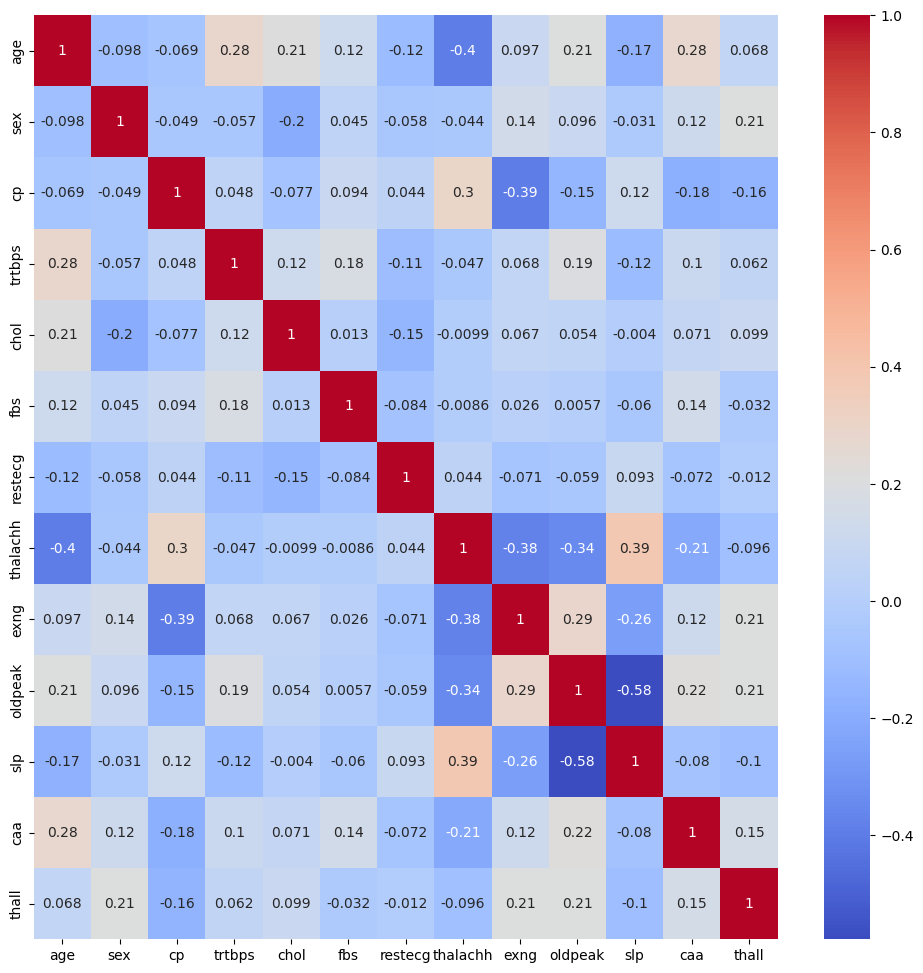

In [30]:
# matriz de correlación
corr_matrix = heartdf_normalized.drop(columns='output').corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

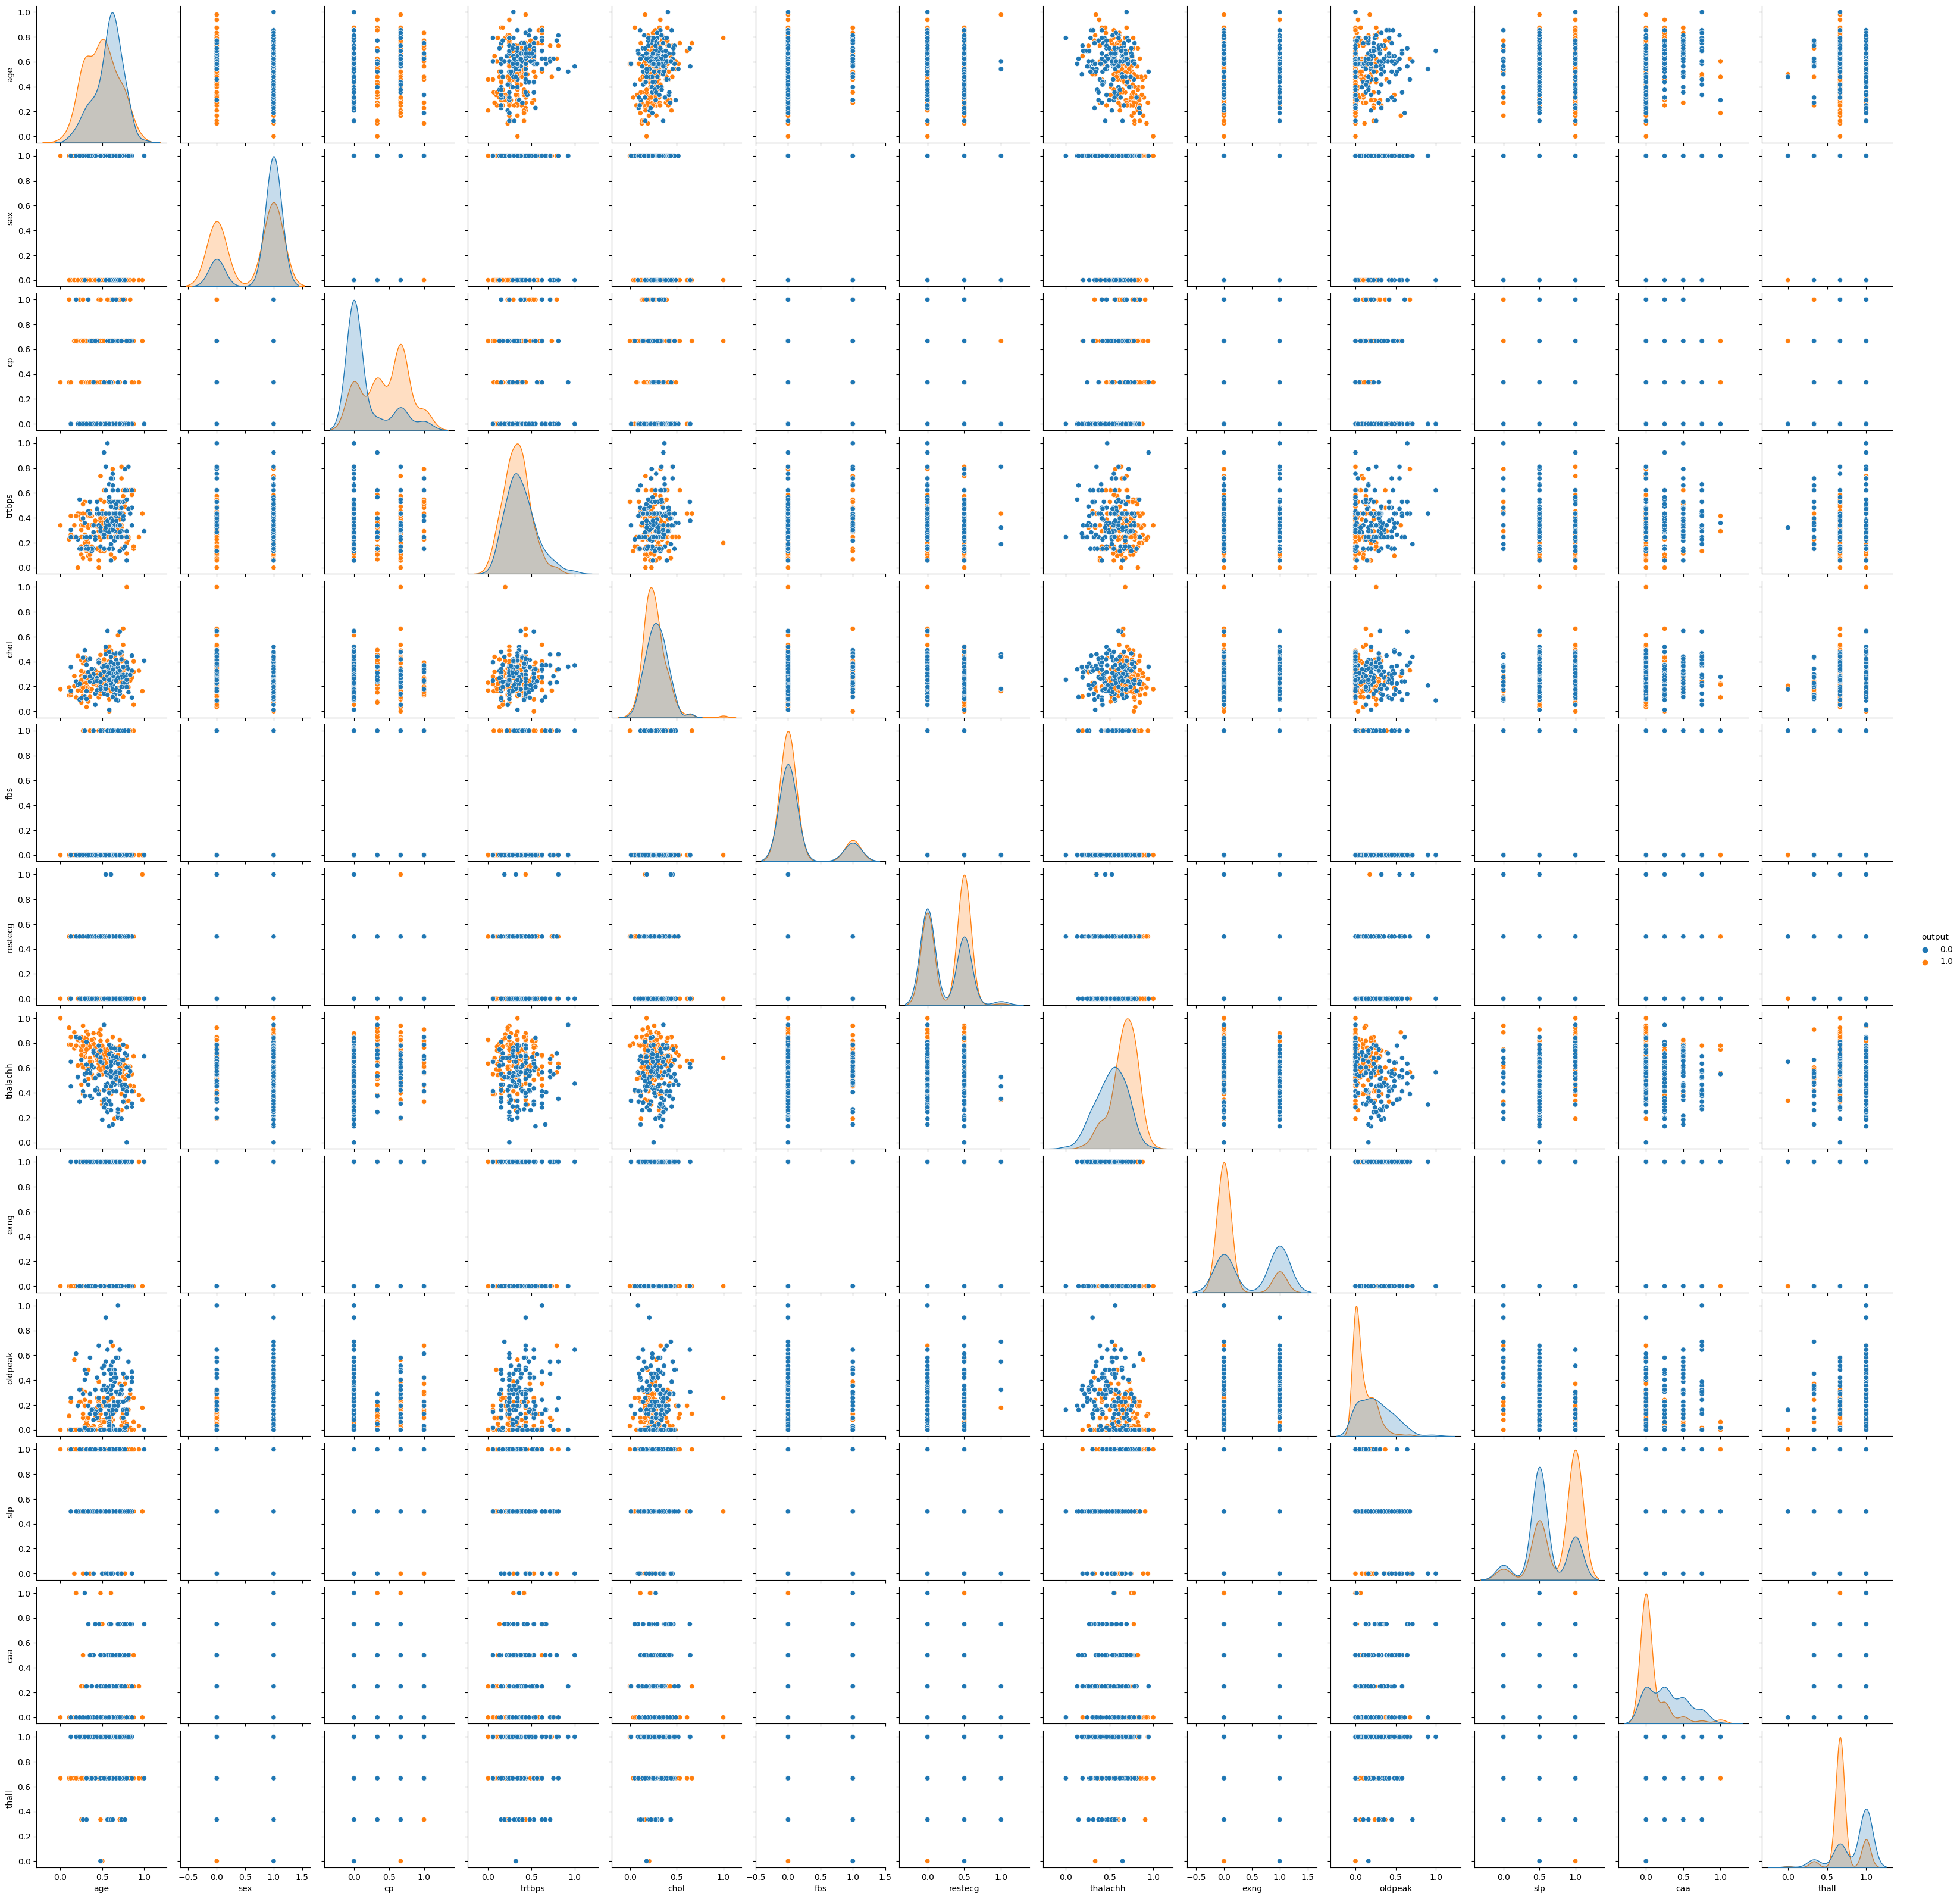

In [29]:
# matriz de dispersión

sns.pairplot(heartdf_normalized,hue='output')
plt.show()